In [70]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from datetime import date,datetime,timedelta
from sklearn.impute import SimpleImputer

In [49]:
def date_iterator_generator(begin, end):
  length = (end - begin).days + 1
  # 0から日数分の数値シーケンス
  for n in range(length):
    yield begin + timedelta(n)

In [108]:
begin = datetime.strptime("20190101","%Y%m%d").date()
end = datetime.strptime("20191231","%Y%m%d").date()

gen = date_iterator_generator(begin,end)
powers = []
for target in gen:
    df = pd.read_csv("/home/s21033/data/toshiba_SCC_data/104_kawasaki/101_buildac/data101/Buildac_power_plant_{}.csv".format(target.strftime("%Y-%m-%d")),encoding="shift-jis")
    if "特高 受電 電力量" in df.columns:
        powers.append(df["特高 受電 電力量"].sum())
    else:
        powers.append(np.nan)

In [46]:
df_power=df.loc[:,"特高 受電 電力量"].sum(axis=0)

In [47]:
df_power

14340.0

In [110]:
ser = pd.Series(powers)

In [117]:
ser.index[ser.apply(np.isnan)]

Int64Index([18, 19, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
            138],
           dtype='int64')

In [120]:
dates = pd.date_range(start="1/1/2019",end="12/31/2019",freq="D")

In [121]:
ser.index = dates

In [123]:
ser.index[ser.apply(np.isnan)]

DatetimeIndex(['2019-01-19', '2019-01-20', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
               '2019-05-18', '2019-05-19'],
              dtype='datetime64[ns]', freq=None)

In [126]:
powers = ser.values

In [127]:
imp = SimpleImputer()
powers_imputed = imp.fit_transform(powers.reshape(-1,1))
powers_imputed

array([[19940.        ],
       [19120.        ],
       [18760.        ],
       [ 9840.        ],
       [21240.        ],
       [37430.        ],
       [45530.        ],
       [44480.        ],
       [44830.        ],
       [46150.        ],
       [42070.        ],
       [22500.        ],
       [20490.        ],
       [20970.        ],
       [47860.        ],
       [42010.        ],
       [42700.        ],
       [31690.        ],
       [30581.93732194],
       [30581.93732194],
       [28210.        ],
       [43900.        ],
       [42110.        ],
       [43140.        ],
       [43880.        ],
       [23010.        ],
       [21360.        ],
       [43050.        ],
       [44620.        ],
       [44800.        ],
       [44450.        ],
       [44950.        ],
       [22340.        ],
       [20140.        ],
       [37820.        ],
       [43930.        ],
       [43320.        ],
       [38850.        ],
       [44070.        ],
       [23530.        ],


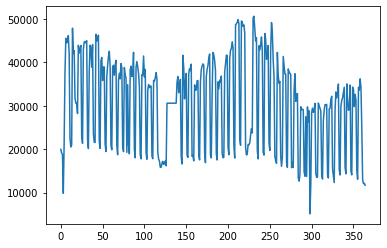

In [129]:
plt.plot(powers_imputed)

In [68]:
powers = np.array(powers)
powers[powers==0] = np.nan

In [69]:
powers

array([19940., 19120., 18760.,  9840., 21240., 37430., 45530., 44480.,
       44830., 46150., 42070., 22500., 20490., 20970., 47860., 42010.,
       42700., 31690.,    nan,    nan, 28210., 43900., 42110., 43140.,
       43880., 23010., 21360., 43050., 44620., 44800., 44450.])

In [72]:
imp = SimpleImputer()
powers_imputed = imp.fit_transform(powers.reshape(-1,1))
powers_imputed

array([[19940.       ],
       [19120.       ],
       [18760.       ],
       [ 9840.       ],
       [21240.       ],
       [37430.       ],
       [45530.       ],
       [44480.       ],
       [44830.       ],
       [46150.       ],
       [42070.       ],
       [22500.       ],
       [20490.       ],
       [20970.       ],
       [47860.       ],
       [42010.       ],
       [42700.       ],
       [31690.       ],
       [34487.5862069],
       [34487.5862069],
       [28210.       ],
       [43900.       ],
       [42110.       ],
       [43140.       ],
       [43880.       ],
       [23010.       ],
       [21360.       ],
       [43050.       ],
       [44620.       ],
       [44800.       ],
       [44450.       ]])

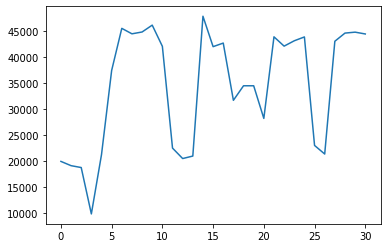

In [73]:
plt.plot(powers_imputed)

In [103]:
df = pd.read_csv("/home/s21033/data/toshiba_SCC_data/104_kawasaki/101_buildac/data101/Buildac_power_plant_2019-01-01.csv",encoding="shift-jis")

In [107]:
"特高 受電 電力量" in df.columns

True